In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
!pip install xlrd

     |████████████████████████████████| 112kB 2.1MB/s eta 0:00:01


In [4]:

xl = pd.ExcelFile("data.xlsx")
xl2 = pd.ExcelFile("data2.xls")


In [5]:
xl.sheet_names

['report2020-01-27_DECLARE_Outlie',
 'Top 100',
 'Bottom 100',
 'Quiz Compare',
 'Time Compare',
 'Resources Interaction Compare',
 'Top Reps Quiz vs Interaction',
 'Top Reps Quiz vs Time Spent',
 'Bot Reps Quiz vs Interaction',
 'Bot Reps Quiz vs Time Spent',
 'Sheet10']

In [6]:
xl2.sheet_names

['DECLARE Summary Learnings_repor']

In [9]:
df = xl.parse('report2020-01-27_DECLARE_Outlie')


tmp = []
for t in df['Time Spent'].values:
    try:
        tmp.append(((t.hour * 60 + t.minute) * 60 + t.second)/60.0)
    except:
        tmp.append(0)


df['time hours'] = tmp


In [10]:
df.head(100)

,Name,Teams,Progress (%),Learning Score,Reinforcement Score,Quiz Score (%),Time Spent,Resource Interactions,Last Activity Date,time hours
0,Monica Farmakis,Evanston IL 1,98.0,9.3,0.0,82.0,09:28:17,170.0,2019-10-17,568.283333
1,Steve Hladek,San Antonio TX 1,98.0,9.3,3.0,79.0,07:32:28,229.0,2019-10-18,452.466667
2,Deborah Crouse,Philadelphia PA,98.0,9.3,0.0,83.0,07:10:12,82.0,2019-10-16,430.200000
3,Gisela Donate,Metro Endocrinologists 1,98.0,9.0,7.0,73.0,12:03:36,304.0,2019-10-21,723.600000
4,Vanessa Gonzalez,Metro,98.0,8.7,0.7,96.0,04:43:22,259.0,2019-10-16,283.366667
...,...,...,...,...,...,...,...,...,...,...
95,Michael Ross,Columbus OH,98.0,7.0,0.3,75.0,03:38:15,292.0,2019-10-18,218.250000
96,Demetrice Padgett-Paul,Washington DC 1,98.0,7.0,1.0,65.0,02:38:01,182.0,2019-10-16,158.016667
97,Lisa Fayne,Newark NJ 1,98.0,7.0,0.0,64.0,02:45:59,118.0,2019-10-18,165.983333
98,Feryal Kadry,Ann Arbor MI 1,98.0,6.7,2.3,49.0,03:06:17,120.0,2019-10-18,186.283333


In [8]:
df2 = xl2.parse('DECLARE Summary Learnings_repor')


tmp = []
for t in df2['Time Spent'].values:
    try:
        tmp.append(((t.hour * 60 + t.minute) * 60 + t.second)/60.0)
    except:
        tmp.append(0)


df2['time hours'] = tmp

In [11]:
len(df),len(df2)

(2723, 1373)

In [13]:
def take_only_good(df):
    tmp = df
    tmp = tmp[tmp['Progress (%)'] > 0]
    tmp = tmp[tmp['Learning Score'] > 0]
    tmp = tmp[tmp['Quiz Score (%)'] > 0]
    tmp = tmp[tmp['time hours'] > 0]
    return tmp

ranked_df = take_only_good(df2)
good_df = take_only_good(df)



len(ranked_df),len(good_df)

(1184, 268)

In [41]:
ranked_df.columns

Index(['Sales Ranking', 'Name', 'Teams', 'Progress (%)', 'Learning Score',
       'Reinforcement Score', 'Quiz Score (%)', 'Time Spent',
       'Resource Interactions', 'Last Activity Date', 'time hours', 'ranked',
       'col'],
      dtype='object')

In [15]:
ranked_df.head(100)

,Sales Ranking,Name,Teams,Progress (%),Learning Score,Reinforcement Score,Quiz Score (%),Time Spent,Resource Interactions,Last Activity Date,time hours
0,2.0,Michael Aberman,Evanston IL 1,100,5.3,0.0,70.0,00:55:41,92,2020-01-06,55.683333
7,10.0,Gwen Davy,Honolulu E HI 3,68,3.7,0.3,90.0,03:07:49,89,2020-01-06,187.816667
8,11.0,Caroline Pagan,Honolulu E HI 1,100,5.7,0.0,75.0,00:33:26,148,2019-12-22,33.433333
9,12.0,Kathy Taketa,Honolulu E HI 2,100,5.0,0.0,52.0,01:18:13,102,2020-01-06,78.216667
10,12.0,Phillip Woodson,Gary IN 2,100,4.7,0.0,49.0,00:58:36,83,2019-12-03,58.600000
...,...,...,...,...,...,...,...,...,...,...,...
117,NaN,Mimi Steffel,St Louis South MO 1,100,6.7,0.3,87.0,02:09:48,68,2019-12-10,129.800000
118,NaN,Eric Calhoun,St Louis South MO 1,100,3.3,0.0,53.0,00:06:31,83,2019-12-11,6.516667
119,NaN,Annie Broussard,Baton Rouge LA 1,100,6.7,1.0,72.0,02:53:55,122,2019-12-19,173.916667
120,NaN,Kimberly Lewing,Shreveport LA 1,100,5.3,0.0,46.0,02:22:21,58,2019-12-10,142.350000


In [20]:
ranked_df['ranked'] = ranked_df['Sales Ranking'].notnull()

In [44]:
sorted_df = ranked_df.sort_values('Learning Score')

n = 100
top = sorted_df.iloc[0:n]
bot = sorted_df.iloc[len(sorted_df) -n :-1]


ranked_df = sorted_df
ranked_df['learning_rank'] = range(len(ranked_df))


In [22]:
for col in ranked_df.columns:
    print(col)

Sales Ranking
Name
Teams
Progress (%)
Learning Score
Reinforcement Score
Quiz Score (%)
Time Spent
Resource Interactions
Last Activity Date
time hours
ranked


In [23]:
ranked_df.corr()


,Sales Ranking,Progress (%),Learning Score,Reinforcement Score,Quiz Score (%),Resource Interactions,time hours,ranked
Sales Ranking,1.000000,-0.213104,-0.262730,0.286918,-0.264215,-0.216791,-0.124446,NaN
Progress (%),-0.213104,1.000000,0.892105,0.178946,0.001885,0.612423,0.420180,0.024436
Learning Score,-0.262730,0.892105,1.000000,0.274023,0.274474,0.626663,0.591041,0.008168
Reinforcement Score,0.286918,0.178946,0.274023,1.000000,0.195529,0.394874,0.372303,-0.022832
Quiz Score (%),-0.264215,0.001885,0.274474,0.195529,1.000000,0.086240,0.234073,-0.006857
Resource Interactions,-0.216791,0.612423,0.626663,0.394874,0.086240,1.000000,0.483102,0.017895
time hours,-0.124446,0.420180,0.591041,0.372303,0.234073,0.483102,1.000000,-0.017193
ranked,NaN,0.024436,0.008168,-0.022832,-0.006857,0.017895,-0.017193,1.000000


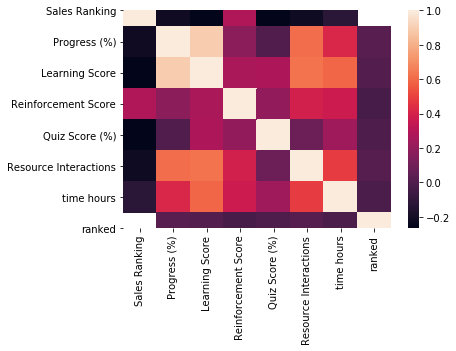

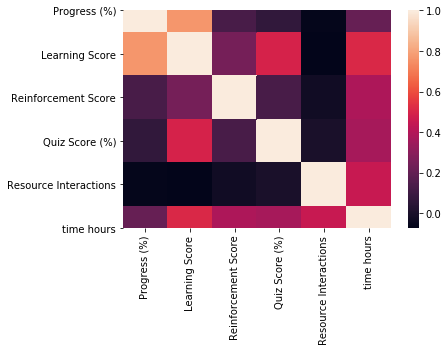

In [27]:

sns.heatmap(ranked_df.corr())
plt.show()

sns.heatmap(good_df.corr())

plt.show()



# ONLY 20 of the ranked sales people meet critera for analysis!!


In [53]:

ranked_df.ranked.sum()

19

In [105]:
sorted_df

,Name,Teams,Progress (%),Learning Score,Reinforcement Score,Quiz Score (%),Time Spent,Resource Interactions,Last Activity Date,time hours,rank
2076,CLIC AZ,"AstraZeneca,Test Macron GA 1",4.0,0.4,0.0,50.0,00:02:41,11.0,2020-01-22,2.683333,1
2060,CLIC AstraZeneca,"AstraZeneca,Test Georgia",4.0,0.8,0.0,100.0,00:00:27,3.0,2020-01-21,0.450000,1
2058,Chris Quinn,AstraZeneca,8.0,0.8,0.4,50.0,00:31:02,58.0,2020-01-23,31.033333,1
1978,Donald Benson,Test Georgia,35.0,1.2,1.2,51.0,00:32:25,184.0,2020-01-24,32.416667,1
1972,Michele Spittal,Northeast Phila PA 1,60.0,1.6,0.0,48.0,00:40:22,109.0,2020-01-14,40.366667,1
...,...,...,...,...,...,...,...,...,...,...,...
4,Vanessa Gonzalez,Metro,98.0,8.7,0.7,96.0,04:43:22,259.0,2019-10-16,283.366667,-1
3,Gisela Donate,Metro Endocrinologists 1,98.0,9.0,7.0,73.0,12:03:36,304.0,2019-10-21,723.600000,-1
2,Deborah Crouse,Philadelphia PA,98.0,9.3,0.0,83.0,07:10:12,82.0,2019-10-16,430.200000,-1
1,Steve Hladek,San Antonio TX 1,98.0,9.3,3.0,79.0,07:32:28,229.0,2019-10-18,452.466667,-1


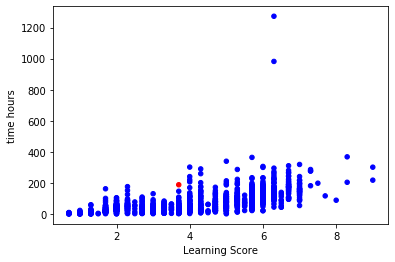

In [43]:

colors = {
    True:'red',
    False:'blue'
} 

ranked_df.plot.scatter('Learning Score', 'time hours', c = ranked_df['ranked'].apply(lambda x: colors[x])) #, colormap='jet')
plt.show()


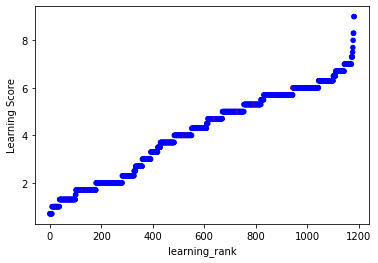

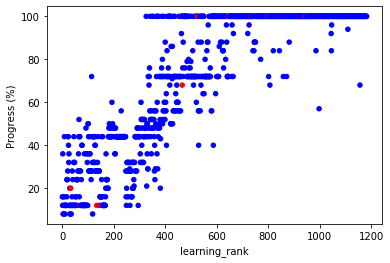

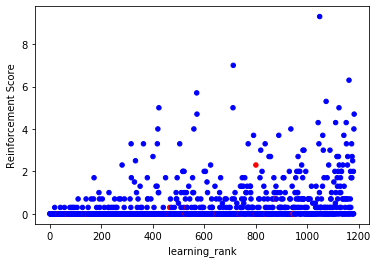

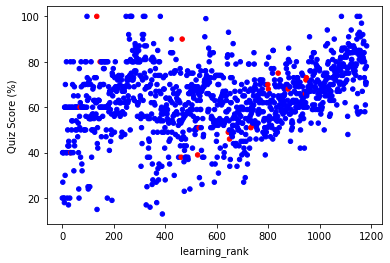

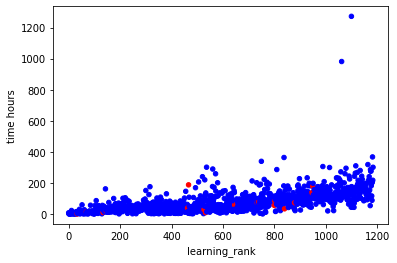

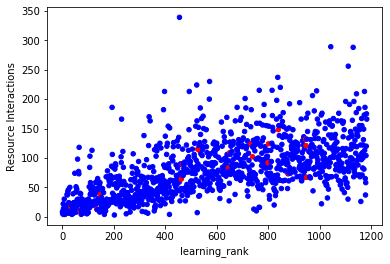

In [47]:
my_cols = [
    'Learning Score',
'Progress (%)',
'Reinforcement Score',
'Quiz Score (%)',
'time hours',
'Resource Interactions',
          ]
          
   
          
for c in my_cols:   
    ranked_df.plot.scatter('learning_rank', c, c = ranked_df['ranked'].apply(lambda x: colors[x])) #, colormap='jet')
    plt.show()
    

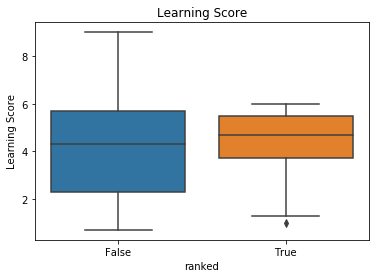

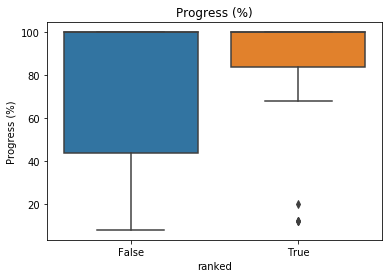

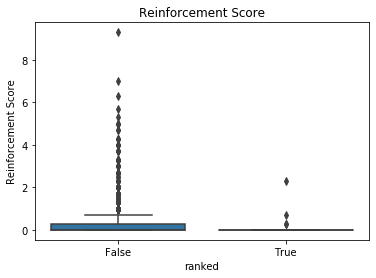

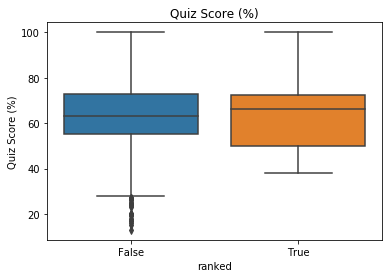

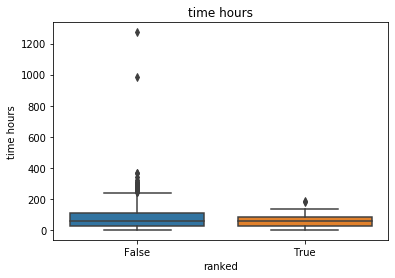

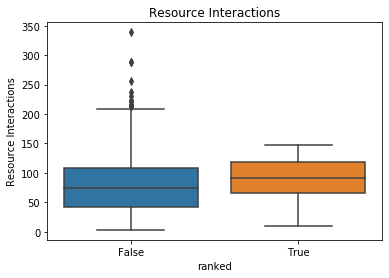

In [54]:
for c in my_cols:
    plt.title(c)
    sns.boxplot(x="ranked", y=c, data=ranked_df)

    plt.show()

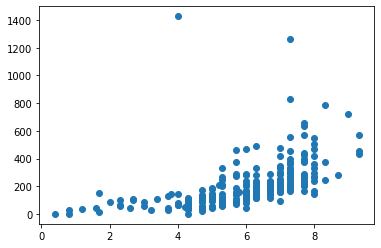

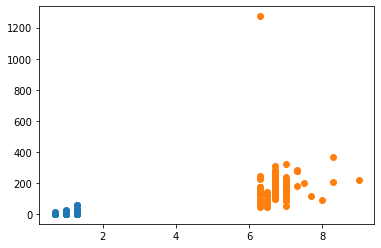

In [30]:

plt.scatter(x=good_df['Learning Score'], y=good_df['time hours'])
plt.show()
plt.scatter(x=top['Learning Score'], y=top['time hours'])
plt.scatter(x=bot['Learning Score'], y=bot['time hours'])
plt.show()


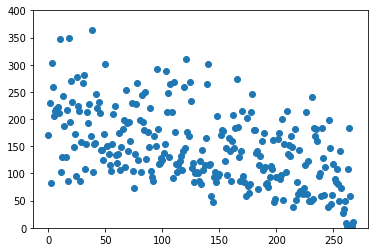

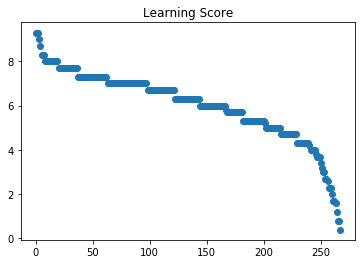

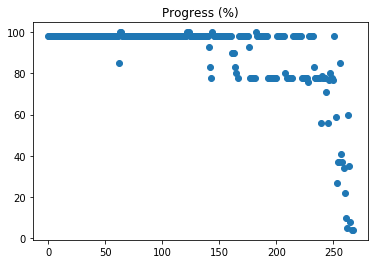

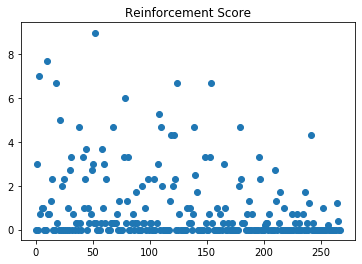

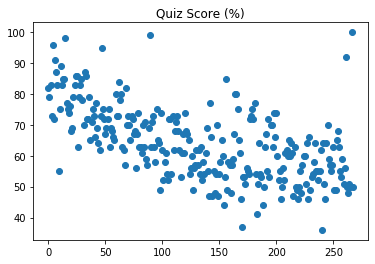

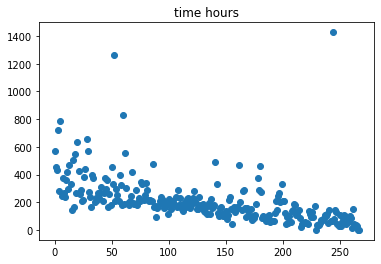

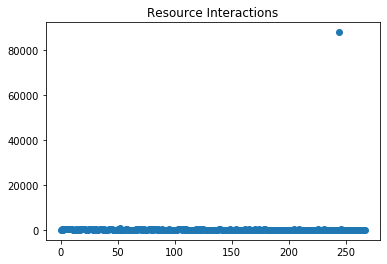

In [127]:
my_cols = [
    'Learning Score',
'Progress (%)',
'Reinforcement Score',
'Quiz Score (%)',
'time hours',
'Resource Interactions',
          ]
          
plt.scatter(x =range(len(good_df)), y = good_df['Resource Interactions'])
plt.ylim(0,400)
plt.show()      
          
for c in my_cols:
    plt.title(c)    
    plt.scatter(x =range(len(good_df)), y = good_df[c])
    plt.show()

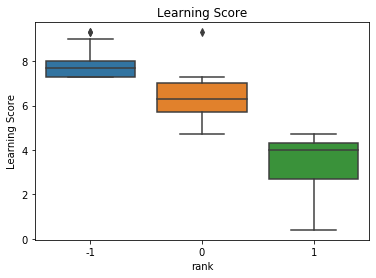

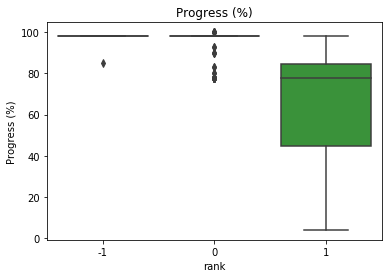

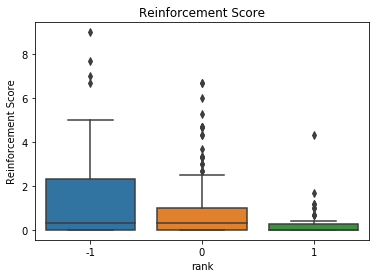

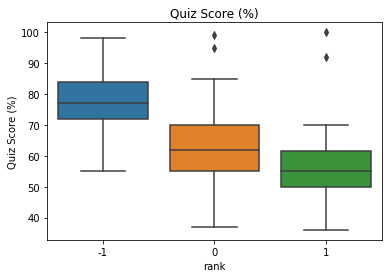

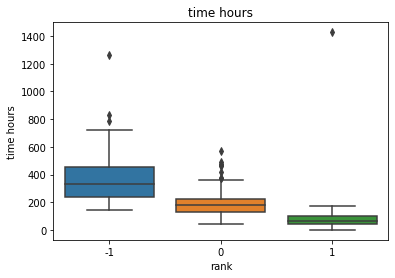

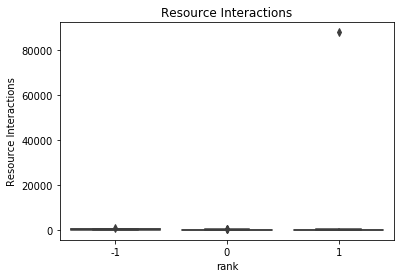

In [128]:
col = 'time hours'
col = 'Learning Score'


for c in my_cols:
    plt.title(c)
    sns.boxplot(x="rank", y=c, data=sorted_df)

    plt.show()

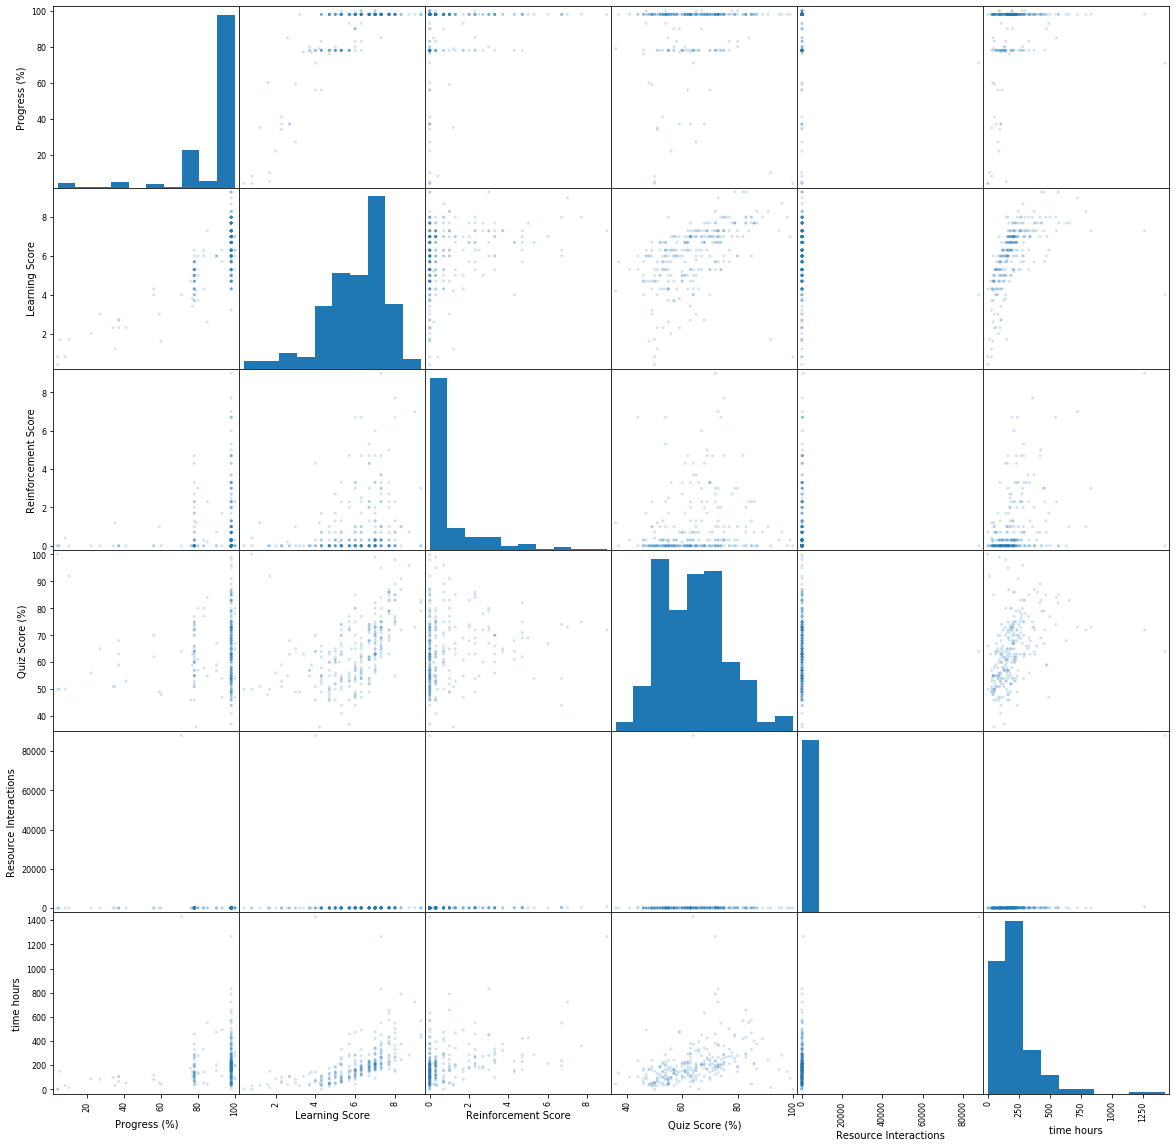

In [88]:
pd.plotting.scatter_matrix(good_df, alpha=0.2, figsize=(20, 20))
plt.show()

In [102]:
good_df.Teams.unique()

array(['Evanston IL 1', 'San Antonio TX 1', 'Philadelphia PA',
       'Metro Endocrinologists 1', 'Metro', 'Allentown PA 1',
       'South Florida', 'Memphis TN', 'Durham NC 1', 'Boston MA',
       'Cleveland OH 1', 'AstraZeneca', 'Jackson MS 2', 'New Haven CT 1',
       'Pittsburgh PA 1', 'Oklahoma City OK 1', 'Riverside CA 1',
       'Philadelphia N PA 1', 'San Juan', 'Knoxville TN 1',
       'Lancaster PA 2', 'Springfield IL 1', 'Bridgeport CT 1',
       'Shreveport LA 1', 'Jacksonville FL 1', 'Philadelphia S PA 1',
       'Toms River NJ 1', 'Dallas W TX 1', 'Macon GA 1',
       'Winston Salem NC 1', 'Buffalo NY 1', 'Santa Barbara CA 1',
       'Austin TX 1', 'Kansas City MO', 'Miami FL 1', 'Denver CO 1',
       'Indianapolis IN', 'Detroit MI', 'Orlando FL 1', 'Charleston WV 1',
       'Honolulu HI 1', 'New Hyde Park NY 1', 'Las Vegas NV 1',
       'Nashville TN 1', 'St Louis MO 1', 'Ann Arbor MI 1',
       'Berkley MI 1', 'Brooklyn S NY 1', 'Seattle WA 1', 'Jackson MS 1',
       'N